[33312.10747554433, 41861.85954107339, 39493.3049413989, 47743.55096926713]


<IPython.core.display.Javascript object>


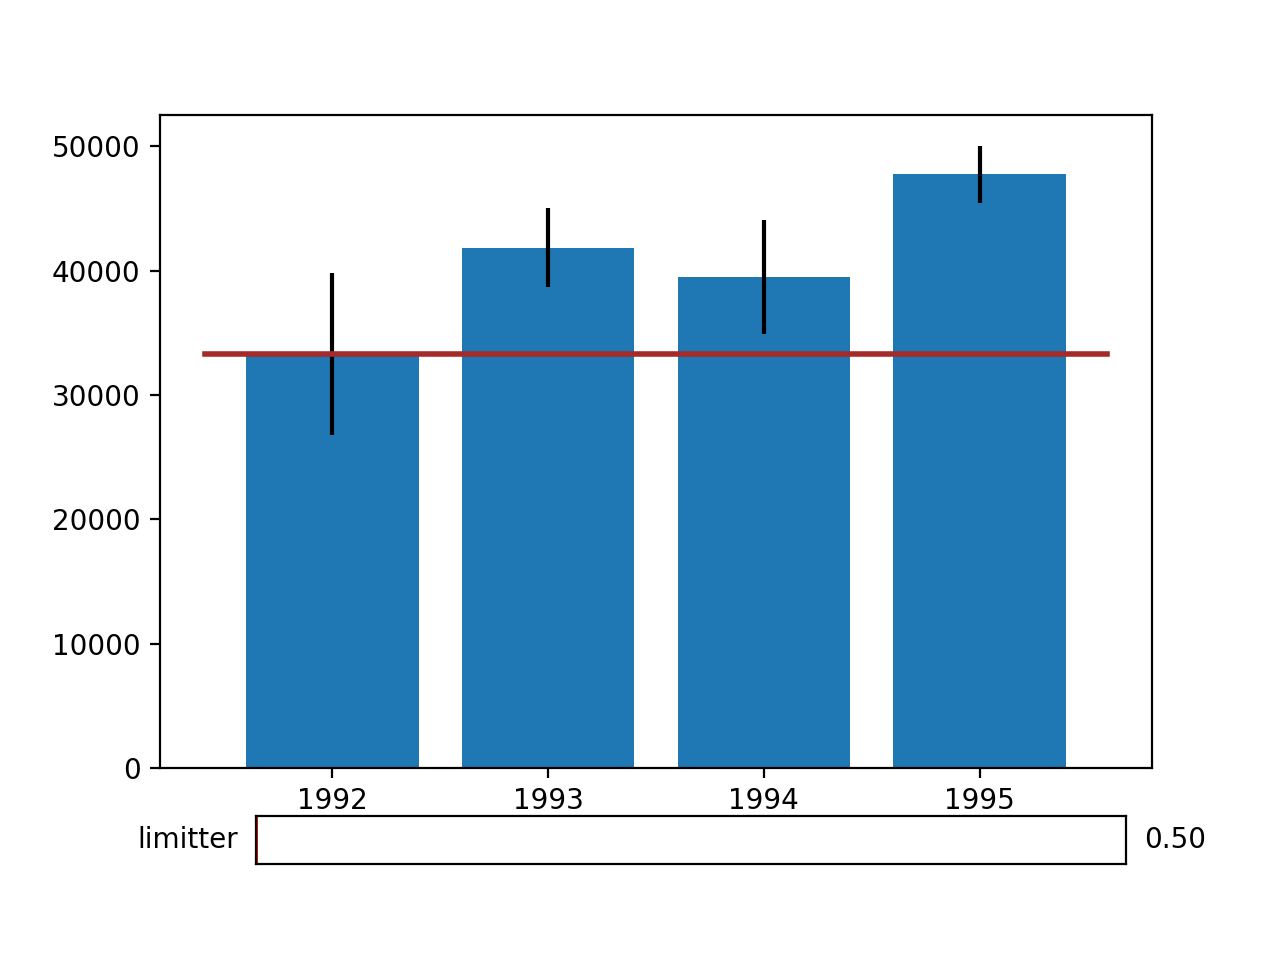

0

In [8]:
# Use the following data for this assignment:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider
%matplotlib notebook
np.random.seed(12345)

df = pd.DataFrame([np.random.normal(32000,200000,3650), 
                   np.random.normal(43000,100000,3650), 
                   np.random.normal(43500,140000,3650), 
                   np.random.normal(48000,70000,3650)], 
                  index=[1992,1993,1994,1995])


df=df.T


info=df.describe()
info

count = info.loc['count'][1992]
bar_index = info.columns
bar_info = info.loc['mean'].tolist()
print(info.loc['mean'].tolist())
std = info.loc['std'].tolist()
c=1.96
bars=[]
margins=[]
fig,ax = plt.subplots()
for i in range(4):
    std_err = std[i]/np.sqrt(count)
    margins.append(std_err*c)
bars=ax.bar(bar_index,bar_info,yerr=margins)
z=33312.10747554433

x,y = plt.gca().get_xlim()
line,=ax.plot((x,y),(z,z),linewidth=2,color = 'brown')
plt.subplots_adjust(bottom = 0.2)

plt.show()

bar_heights = []
for bar in bars:
    bar_heights.append(bar.get_height())
max_height=np.max(bar_heights)
p,q = plt.gca().get_ylim()
ax1=plt.axes([0.2,0.1,0.68,0.05])
slider = Slider(ax=ax1,label='limitter',valmin = p , valmax=q ,closedmax=True,color='green')

def updating(event):
    yval = slider.val
    line.set_ydata(yval)
    for bar in bars:
        if bar.get_height() > yval:
            bar.set_color('red')
        elif bar.get_height() < yval:
            bar.set_color('blue')
        elif bar.get_height() == yval:
            bar.set_color('green',alpha=0.25)
            
    plt.draw()
    
slider.on_changed(updating)